# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


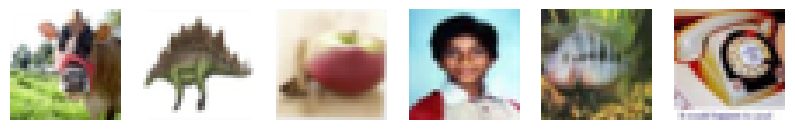

In [3]:
# Your Code Here

import numpy as np
import matplotlib.pyplot as plt

# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


# Display images
num_images = 6
fig, axes = plt.subplots(1, num_images, figsize=(10, 2))

for i in range(num_images):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')

plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your Code Here

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split training data into training (80%) and testing (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Dropout(0.2),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.4),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 644,388 (2.46 MB)

 Trainable params: 643,940 (2.46 MB)

 Non-trainable params: 448 (1.75 KB)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [7]:
# Your Code Here

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

I chose 25 epochs to start with because I believe it to be a reasonable starting place. I may have to increase it based on the trends observed. I didn't want to start too high in case the model doesn't learn enough features and train well enough. I edited this after 25 to 50 and it ended up being worse in terms of accuracy so I've reverted to 25.

In [8]:
# Your Code Here

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=25, batch_size=32,
    validation_data=(x_val, y_val)
)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.0209 - loss: 4.6492 - val_accuracy: 0.0393 - val_loss: 6.3927
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0428 - loss: 4.3061 - val_accuracy: 0.0428 - val_loss: 15.3301
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.0589 - loss: 4.1454 - val_accuracy: 0.0430 - val_loss: 13.3511
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0793 - loss: 4.0051 - val_accuracy: 0.0470 - val_loss: 15.4540
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.0910 - loss: 3.8832 - val_accuracy: 0.0672 - val_loss: 10.5789
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1157 - loss: 3.7602 - val_accuracy: 0.0779 - val_loss: 11.3109
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1349 - loss: 3.6538 - val_accuracy: 0.0921 - val_loss: 10.9172
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1604 - loss: 3

I observe that the validation accuracy is decreasing at epoch 23 which it means the model is now being over fitted and will not be able to handle new data well. Validation loss is also increasing at this point which further confirm this. To prevent overfitting included a dropout rate during training to temporarily remove a set of neurons in the network for a better result.

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [9]:
# Your Code Here

from sklearn.metrics import classification_report

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Get predictions and report precision, recall, f1-score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
report = classification_report(y_true_classes, y_pred_classes)
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3494 - loss: 3.2188
Test Accuracy: 0.3492
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       100
           1       0.47      0.27      0.34       100
           2       0.48      0.13      0.20       100
           3       0.18      0.22      0.20       100
           4       0.12      0.07      0.09       100
           5       0.38      0.26      0.31       100
           6       0.48      0.21      0.29       100
           7       0.29      0.55      0.38       100
           8       0.51      0.61      0.56       100
           9       0.73      0.41      0.53       100
          10       0.31      0.17      0.22       100
          11       0.80      0.08      0.15       100
          12       0.50      0.33      0.40       100
          13       0.60      0.09      0.16       100
          14       0.62      0.08      0.14       

In [10]:
# Get actual labels (ensure it's in the right shape)
y_true_labels = np.argmax(y_test, axis=1)

# Find misclassified indices
misclassified_indices = np.where(y_pred_classes != y_true_labels)[0]

print(f"Number of misclassified images: {len(misclassified_indices)}")

Number of misclassified images: 6508


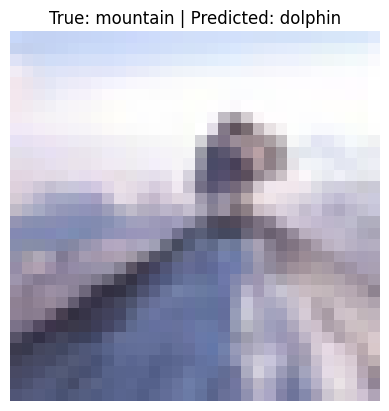

In [11]:
import matplotlib.pyplot as plt

# Select the first misclassified image
idx = misclassified_indices[0]

# Get the image and its true/predicted labels
image = x_test[idx]
true_label = class_names[y_true_labels[idx]]
predicted_label = class_names[y_pred_classes[idx]] # Changed from y_pred_labels to y_pred_classes

# Plot the image
plt.imshow(image)
plt.title(f"True: {true_label} | Predicted: {predicted_label}")
plt.axis("off")
plt.show()

In [12]:
# Get probabilities for this image
y_pred_probs = model.predict(x_test)
probs = y_pred_probs[idx]

# Print top 5 most confident predictions
top_5_indices = np.argsort(probs)[-5:][::-1]  # Get indices of top 5 predictions
top_5_labels = [class_names[i] for i in top_5_indices]
top_5_probs = probs[top_5_indices]

print("Top 5 Predictions:")
for label, prob in zip(top_5_labels, top_5_probs):
    print(f"{label}: {prob:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Top 5 Predictions:
dolphin: 0.3427
cloud: 0.1758
road: 0.0867
spider: 0.0797
skyscraper: 0.0553


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

The plots show divergence when it should be showing convergence of the results. It shows that the model's training accuracy is increasing and in fact much more accurate than the testing accuracy.

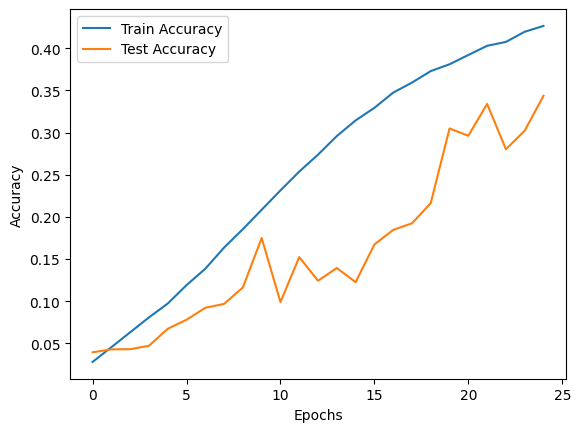

In [13]:
# Your Code Here

import matplotlib.pyplot as plt

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

The advanced technique I chose was Data Augmentation to help the model generalize better by flipping, rotating, and zooming to allow the model familiarize itself with different aspects of the images in the dataset.

In [14]:
# Your Code Here

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation and tune parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Train using augmented data
train_generator = datagen.flow(x_train, y_train, batch_size=32)
history_augmented = model.fit(train_generator, epochs=25, validation_data=(x_val, y_val))


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.3330 - loss: 2.6169 - val_accuracy: 0.2517 - val_loss: 4.3468
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.3431 - loss: 2.5377 - val_accuracy: 0.3591 - val_loss: 2.9832
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 0.3542 - loss: 2.4956 - val_accuracy: 0.2869 - val_loss: 3.7967
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.3593 - loss: 2.4751 - val_accuracy: 0.2467 - val_loss: 4.2066
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.3664 - loss: 2.4376 - val_accuracy: 0.2793 - val_loss: 3.9640
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.3637 - loss: 2.4292 - val_accuracy: 0.3383 - val_loss: 3.2040
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.3696 - loss: 2.4192 - val_accuracy: 0.4012 - val_loss: 2.5164
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.3775 - loss: 2.37

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [15]:
# Your Code Here

# Re-train the model
history = model.fit(
    x_train, y_train,
    epochs=25, batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4723 - loss: 1.9460 - val_accuracy: 0.3782 - val_loss: 3.0394
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4838 - loss: 1.8850 - val_accuracy: 0.4323 - val_loss: 2.4580
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4869 - loss: 1.8595 - val_accuracy: 0.4289 - val_loss: 2.5837
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4991 - loss: 1.8116 - val_accuracy: 0.4236 - val_loss: 2.4925
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4950 - loss: 1.7992 - val_accuracy: 0.4474 - val_loss: 2.3787
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5103 - loss: 1.7514 - val_accuracy: 0.4052 - val_loss: 2.7866
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5126 - loss: 1.7351 - val_accuracy: 0.4291 - val_loss: 2.5584
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5203 - loss: 1.7160

In [16]:
from sklearn.metrics import classification_report

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Get predictions and report precision, recall, f1-score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Classification report
report = classification_report(y_true_classes, y_pred_classes)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4799 - loss: 2.2172
Test Accuracy: 0.4729
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.02      0.01      0.01       107
           2       0.00      0.00      0.00        88
           3       0.01      0.01      0.01       103
           4       0.01      0.02      0.01        93
           5       0.00      0.00      0.00       105
           6       0.06      0.04      0.05        93
           7       0.00      0.00      0.00        96
           8       0.01      0.01      0.01        87
           9       0.02      0.01      0.01        88
          10       0.03      0.05      0.04       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00        99
          13       0.00      0.00      0.00        86
          14       0.00      0.00      0.00       1

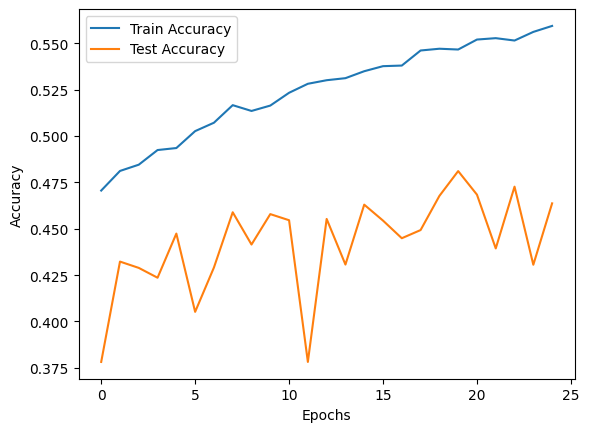

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The model's performance improved using the validation set, I also noticed that the model's training accuracy is increasing and in fact much more accurate than the testing accuracy.
Making the model more robust using the Image Data Generator helped the model generalize better by flipping, rotating, and zooming to allow the model familiarize itself with different aspects of the images in the dataset.
Yes, there is room for improvement because the model's accuracy rate is still too low and is still incorrectly identifying too many photos.
For future tuning of the model, I would consider early stopping to prevent overfitting.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.